In [15]:
import os
import numpy as np
from PIL import Image

# DATASET

In [16]:
eyewear_encode = {'open': 0, "sunglasses":1}

In [17]:
# Training Data
train_files =list(map(lambda x: os.path.join("TrainingSet/",x ),os.listdir("TrainingSet")))

X_train = []
y_train = []

for i in train_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_train.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_train.append(m)
        
# Test Data
test_files =list(map(lambda x: os.path.join("TestSet/",x ), os.listdir("TestSet/")))

X_test = []
y_test = []

for i in test_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_test.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_test.append(m)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# DECISION TREE

## part a

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

In [21]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [22]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.7111111111111111
0.45555555555555555


## part b

__Did your model performs well? Is bias low or high? What about variance?__

Bias is low, variance is high. So model is not performed well.

# BAGGING MODELS

## part c

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
bagging_clf1 = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=False, 
                                 max_features=40, random_state=0, n_jobs=-1)
bagging_clf1.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part d

In [21]:
# PLOT

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [26]:
test_accur = []

for i in range(1, 41):
    bagging_clf1 = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), n_jobs=-1,bootstrap=False,
                                     max_features=40, random_state=0, n_estimators=i)
    x=bagging_clf1.fit(X_train, y_train)
    test_accur.append(accuracy_score(x.predict(X_test),y_test))

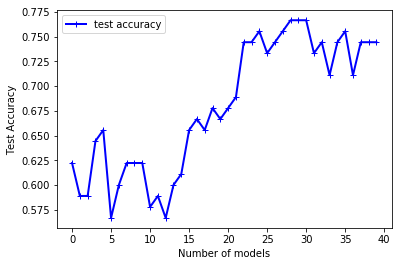

In [27]:
fig, ax = plt.subplots()

ax.plot(test_accur, "b-+", linewidth=2, label="test accuracy")
ax.legend()
ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Number of models")
plt.show()

## part e

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model  which has the best number of models.__

28,29,30

In [28]:
best_model = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=False,
                               max_features=40, random_state=0,n_jobs=-1, n_estimators=30)
best_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=30, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [29]:
train_best_pred=best_model.predict(X_train)
test_best_pred=best_model.predict(X_test)

In [30]:
train_acc = accuracy_score(y_train,train_best_pred)
test_acc =accuracy_score(y_test, test_best_pred)

In [31]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part f

__Compare the decision tree classifier in part a and best bagging classifier in part e in terms of accuracy, bias, and variance.__

When we look accuracies, best bagging classifier is better than decision tree classifier. Variance is lower for bagging and bias may be around the same level.

## part g

In [32]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=True,max_samples=1.0, 
                                 bootstrap_features=False, max_features=40, n_jobs=-1, random_state=0)
bagging_clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part h

In [20]:
# PLOT

In [33]:
test_accuracy = []

for i in range(1, 41):
    bagging_clf2 =BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=True,max_samples=1.0, 
                                    bootstrap_features=False,max_features=40, n_jobs=-1, random_state=0, n_estimators=i)
    x=bagging_clf2.fit(X_train, y_train)
    test_accuracy.append(accuracy_score(y_test, x.predict(X_test)))

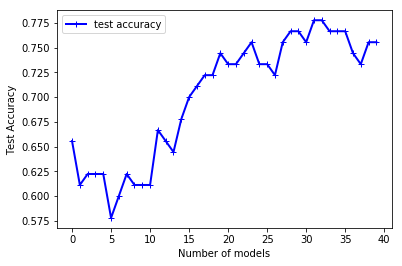

In [34]:
fig, ax = plt.subplots()

ax.plot(test_accuracy, "b-+", linewidth=2, label="test accuracy")
ax.legend()
ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Number of models")
plt.show()

In [84]:
print(test_accuracy[28:33])

[0.7666666666666667, 0.7666666666666667, 0.7555555555555555, 0.7777777777777778, 0.7777777777777778]


## part i

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model which has the best number of models.__

30 and 31

In [109]:
best_model2 = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=False,
                                max_features=40, random_state=0, n_estimators=31)
best_model2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=31, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [110]:
train_best_pred2=best_model2.predict(X_train)
test_best_pred2=best_model2.predict(X_test)

In [111]:
train_acc = accuracy_score(y_train,train_best_pred2)
test_acc =accuracy_score(y_test,test_best_pred2)

In [112]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part j

__Compare the decision tree classifier in part a and best bagging classifier in part i in terms of accuracy, bias, and variance.__

Of course best bagging classifier in part i has better accuracy. We can say that there is a similar trade-off results for bias and variance. 


## part k

__Compare two bagging models that you found in part e and part i in terms of accuracy, bias, and variance.__

When we compare two models on their accuracy, part e has better accuracy than part i. 

## part l

__How sampling features and sampling instances affected the performance of your model? Why?__

For sampling instances, they affected the performance of my model became less overfit. For sampling features, our model are indipendent so they fit good to our data 

# BOOSTING MODELS

## part m

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

## part n

In [28]:
# PLOT

In [43]:
train_accur_bost=[]
test_accur_bost = []

for i in range(1, 51):
    adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0, n_estimators=i)
    y=adaboost_clf.fit(X_train, y_train)
    train_accur_bost.append(accuracy_score(y.predict(X_train),y_train))
    test_accur_bost.append(accuracy_score(y.predict(X_test),y_test))

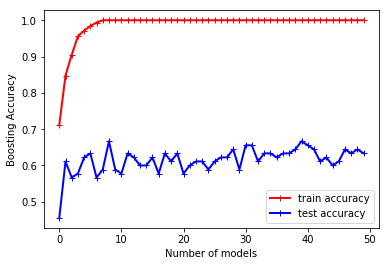

In [44]:
fig, ax = plt.subplots()
ax.plot(train_accur_bost, "r-+", linewidth=2, label="train accuracy")
ax.plot(test_accur_bost, "b-+", linewidth=2, label="test accuracy")
ax.legend()
ax.set_ylabel("Boosting Accuracy")
ax.set_xlabel("Number of models")
plt.show()

## part o

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Report train and test accuracy of the boosting model which has the best number of models.__

9 and 40

In [62]:
adaboost_clf_best = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=2), n_estimators=9, random_state=0)
adaboost_clf_best.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=9, random_state=0)

In [63]:
train_pred_ada=adaboost_clf_best.predict(X_train)
test_pred_ada=adaboost_clf_best.predict(X_test)

In [64]:
train_acc = accuracy_score(y_train, train_pred_ada)
test_acc =accuracy_score(y_test, test_pred_ada)

In [65]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

1.0
0.6666666666666666


# STACKING

## part p

In [66]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
log_clf =LogisticRegression(random_state=0, C = 0.001, penalty= "l2", solver="saga") 
svc_clf =SVC(random_state=0, C= 0.1, decision_function_shape = "ovo",kernel="poly",tol=0.0001, probability= True)

In [68]:
train_set_1, train_set_2, train_y_1, train_y_2 = train_test_split(X_train, y_train, random_state=0, test_size=0.5)

In [69]:
# DON'T REMOVE THIS CELL
print(sum(train_set_1))
print(sum(train_set_2))
print(sum(train_y_1))
print(sum(train_y_2))

[126 212  77 ... 231 145 182]
[ 72 133 179 ... 189  52 160]
76
82


In [70]:
#training on Logistic Regression
log_clf.fit(train_set_1, train_y_1)

C:\Python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
#training on SVC
svc_clf.fit(train_set_1, train_y_1)

C:\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.0001, verbose=False)

## part q

In [72]:
log_proba = log_clf.predict_proba(train_set_2)
svc_proba = svc_clf.predict_proba(train_set_2)

In [75]:
new_train_set_2=[]
if len(log_proba)==len(svc_proba):
    for i in range(len(log_proba)):
        pairs=[]
        if len(log_proba[i])==len(svc_proba[i]):
            pairs.append(log_proba[i][0])
            pairs.append(svc_proba[i][0])
        new_train_set_2.append(pairs)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
blender = RandomForestClassifier(random_state = 0, max_depth=1, n_estimators=10)
blender.fit(new_train_set_2, train_y_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
# DON'T REMOVE THIS CELL
print(sum(np.array(new_train_set_2)))

[76.8927692  73.44946142]


## part r

In [79]:
log_proba_test=log_clf.predict_proba(X_test)
svc_proba_test=svc_clf.predict_proba(X_test)

In [80]:
new_test_set=[]
if len(log_proba_test)==len(svc_proba_test):
    for i in range(len(log_proba_test)):
        pairs=[]
        if len(log_proba_test[i])==len(svc_proba_test[i]):
            pairs.append(log_proba_test[i][0])
            pairs.append(svc_proba_test[i][0])
        new_test_set.append(pairs)

In [81]:
blender_pred=blender.predict(new_test_set)

In [82]:
from sklearn.metrics import f1_score

test_acc =accuracy_score(y_test, blender_pred)
test_f1 =f1_score(y_test, blender_pred) 

In [83]:
# DON'T REMOVE THIS CELL
print("\nTest Scores:")
print(test_acc)
print(test_f1)


Test Scores:
0.8111111111111111
0.7848101265822784


__Did stacking model perform well?__

Stackin model perform well with almost 80%.